In [1]:
#Data pre-processing 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
import plotly.express as px 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve
DataFrame=pd.read_csv('heart.csv')
print(DataFrame.head())
print(DataFrame.info())
#2/3 train 1/3 testing and validation
#error 
#so in total there are 908 dataset 
#Note that there are 5 features variables that need to convert in to some integer for model to understand 

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [2]:
FeaturesConvert=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for feature in FeaturesConvert:
    Replace={}
    for num,value in enumerate(DataFrame[feature].unique()):
        Replace[value]=num
    DataFrame[feature]=DataFrame[feature].replace(Replace)


In [3]:
print(DataFrame.head())
print(DataFrame.describe())#Statistics propety

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   
3   48    1              2        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  
              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.210240  

410


/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_917/1602700333.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


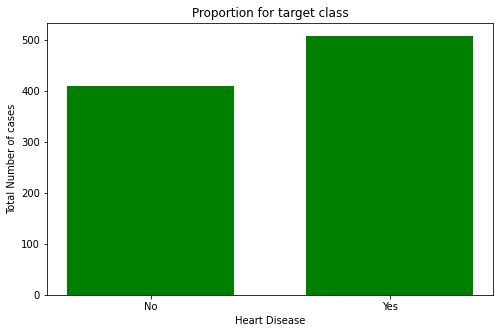

In [4]:
#generalize the bar plot to see how the target(HeartDisease) is distributed
y=DataFrame['HeartDisease'].value_counts().sort_index()
print(y[0])
HeartDisease={'No':y[0],'Yes':y[1]}
YesOrNo=list(HeartDisease.keys())
values=list(HeartDisease.values())
fig=plt.figure(figsize=(8,5))

plt.bar(YesOrNo,values,color='Green',width=0.7)
plt.xlabel('Heart Disease')
plt.ylabel('Total Number of cases')
plt.title('Proportion for target class')
fig.show()

/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_917/2015103965.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


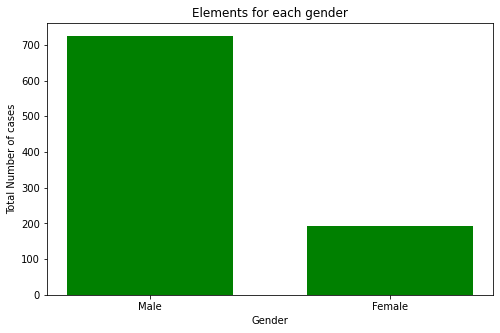

In [5]:
y2=DataFrame['Sex'].value_counts().sort_index()
GenderDict={'Male':y2[0],'Female':y2[1]}
fig2=plt.figure(figsize=(8,5))
Gender=list(GenderDict.keys())
value2=list(GenderDict.values())
plt.bar(Gender,value2,color='Green',width=0.69)
plt.xlabel('Gender')
plt.ylabel('Total Number of cases')
plt.title('Elements for each gender')
fig2.show()

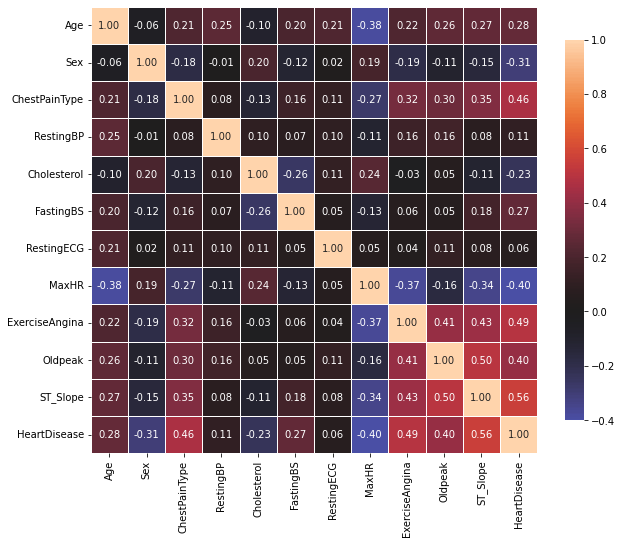

In [6]:
def CorrelationHeatmap(Data):
    correlations=DataFrame.corr()
    fig,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(correlations,vmax=1.0,center=0,fmt='.2f',square=True,linewidths=.5,annot=True,cbar_kws={'shrink': .70})
    plt.show()

CorrelationHeatmap(DataFrame)

In [7]:
to_sort=DataFrame.corr("spearman")["HeartDisease"].sort_values(ascending=False)
fig = px.bar( x=to_sort.index[1:], y=to_sort.values[1:], 
             title="Spearman correlation between features and HeartDisease",labels={"y": "Correlation","x": "Feature"})
fig.add_hline(y=0)
fig.show()

In [8]:
#we see that Sex and MaxHR and Cholesterol have negative correlation with HeartDisease
print(np.shape(np.array(DataFrame))[1])

12


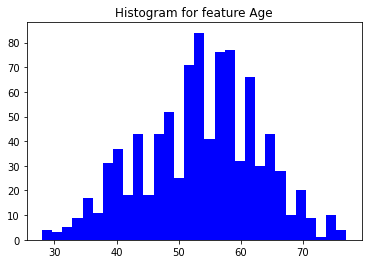

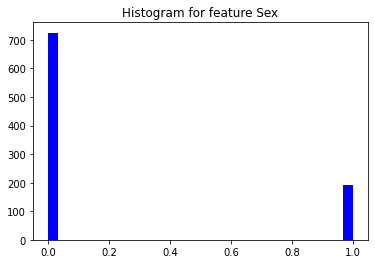

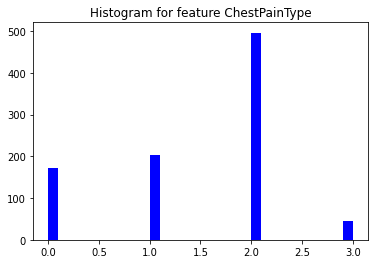

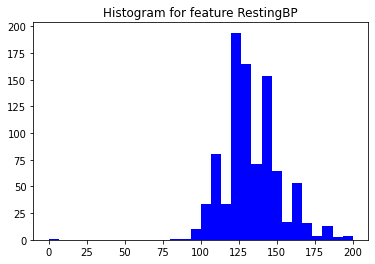

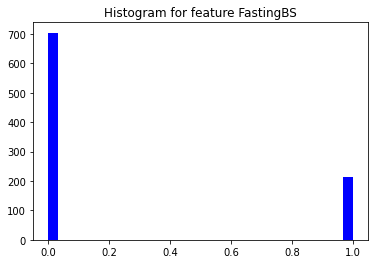

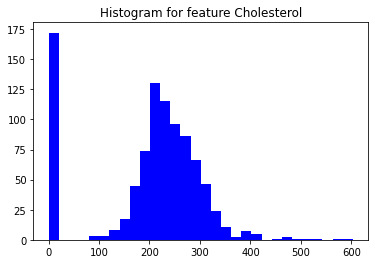

In [9]:
AgeData=DataFrame['Age']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature Age')
plt.show()

AgeData=DataFrame['Sex']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature Sex')
plt.show()

AgeData=DataFrame['ChestPainType']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature ChestPainType')
plt.show()

AgeData=DataFrame['RestingBP']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature RestingBP')
plt.show()

AgeData=DataFrame['FastingBS']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature FastingBS')
plt.show()

AgeData=DataFrame['Cholesterol']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature Cholesterol')
plt.show()
#1 RestingBP has an outlier with value 0 
#2 Cholesterol has a large group (172) with value 0 

#In the first case, the outlier can easly be detected and removed using mean and standard deviation. The second case must be handled differently: 
# it'd be wrong to remove all these elements from the dataset so 
# another way to handle this problem could be replace this values with predictions made from a regression model.

In [10]:
#For each features, except HeartDisease, checks for the outlier
DataFrame=pd.read_csv('heart.csv')
FeaturesConvert=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for feature in FeaturesConvert:
    Replace={}
    for num,value in enumerate(DataFrame[feature].unique()):
        Replace[value]=num
    DataFrame[feature]=DataFrame[feature].replace(Replace)
for feature in DataFrame.columns[:-1]:
    mean=DataFrame[feature].mean()
    std=DataFrame[feature].std()
    #I have chosen to consider outliers all elements outside 6*std
    remove=(DataFrame[feature]<mean-6*std) | (DataFrame[feature]>mean+6*std)
    if (remove).any():
        print("Removed element(s) with:",feature,round(DataFrame[feature].loc[remove].values[0],2))
        DataFrame=DataFrame.loc[~remove]
        DataFrame.reset_index()
print("# of outliers removed:",918-DataFrame.shape[0])
print(np.shape(np.array(DataFrame)))

Removed element(s) with: RestingBP 0
# of outliers removed: 1
(917, 12)


In [11]:
#we now fix the wrong Cholesterol values.
labels=DataFrame["HeartDisease"]

filtered_data=DataFrame[DataFrame["Cholesterol"]>0]
#here we filter the dataset that in outlier and we try to use regression to predict those values 
X,y=filtered_data.drop(columns="Cholesterol"),filtered_data["Cholesterol"]
print('The X dataset are :',X.head())
print(np.shape(np.array(X)))
print(y)

The X dataset are :    Age  Sex  ChestPainType  RestingBP  FastingBS  RestingECG  MaxHR  \
0   40    0              0        140          0           0    172   
1   49    1              1        160          0           0    156   
2   37    0              0        130          0           1     98   
3   48    1              2        138          0           0    108   
4   54    0              1        150          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0               0      0.0         0             0  
1               0      1.0         1             1  
2               0      0.0         0             0  
3               1      1.5         1             1  
4               0      0.0         0             0  
(746, 11)
0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 746, dtype: int64


In [12]:
#linear regression
LinearR=LinearRegression().fit(X,y)
Y_pred=LinearR.predict(X)
LinearError=mean_squared_error(y,Y_pred,squared=False)
MeanError=mean_squared_error(y,[y.mean()]*len(y),squared=False)
MedianError=mean_squared_error(y, [y.median()]*len(y), squared=False)

#Ridge
RidgeR=linear_model.Ridge(alpha=0.1).fit(X,y)
Y_predRidge=RidgeR.predict(X)
RidgeError=mean_squared_error(y,Y_predRidge,squared=False)

#lasso
LassoR=linear_model.Lasso(alpha=0.1).fit(X,y)
Y_predLasso=LassoR.predict(X)
LassoError=mean_squared_error(y,Y_predLasso,squared=False)

#elastic-net
ElasticR=linear_model.ElasticNet(alpha=0.1).fit(X,y)
Y_predElastic=ElasticR.predict(X)
ElasticError=mean_squared_error(y,Y_predElastic,squared=False)

fig = px.bar(x=["Linear","Mean","Median","Lasso","Ridge","Elastic-net"], 
             y=[LinearError,MeanError,MedianError,LassoError,RidgeError,ElasticError],
             title="Regression errors",
             labels={"y": "Error","x": "Regression method"})
fig.add_hline(y=min([LinearError,MeanError,MedianError,LassoError,RidgeError]))
fig.show()

In [13]:
'''
All regression methods perform slightly better than using median/mean as replacements.

Among all regression methods, Linear and Ridge achieved the lowest errors (however, the difference between all regression error is very small).

We will use the prediction of the Linear model.
'''

#we need to select only the data with wrong Cholesterol values and drop the Cholesterol column
y_pred=LinearR.predict(DataFrame[DataFrame["Cholesterol"]==0].drop(columns="Cholesterol"))

#Replace the value 
DataFrame.loc[DataFrame["Cholesterol"]==0,"Cholesterol"]=y_pred
print(np.shape(DataFrame))
print()
#so we have replace the cholesterol outliers by regression 

columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
cat_cols=list(set(DataFrame.columns)-set(columns)-{'HeartDisease'})#make sure no extra columns
cat_cols.sort()
print('The cat_cols is: ',cat_cols)
#splitting in train=80% and test=20%
random_seed=9
DataFrameTrain,DataFrameTest=train_test_split(DataFrame,test_size=0.2,random_state=random_seed,stratify=DataFrame['HeartDisease'])
#we use stratified Train-Test Splits Some classification problems do not have a balanced number of examples for each class label. As such
# , it is desirable to split the dataset
# into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
#setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that 
#both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.
#standardization of the data in order to ease calculations
print(DataFrameTrain.shape)
print(DataFrameTest.shape)
print()
print(DataFrameTrain['HeartDisease'].value_counts(normalize=True))
print()
print(DataFrameTest['HeartDisease'].value_counts(normalize=True))

(917, 12)

The cat_cols is:  []
(733, 12)
(184, 12)

1    0.552524
0    0.447476
Name: HeartDisease, dtype: float64

1    0.554348
0    0.445652
Name: HeartDisease, dtype: float64


In [14]:
#Scale the numerical variables 
scaler = StandardScaler()
scaler.fit(DataFrameTrain[columns])

def GetFeatureAndTargetArrays(DataFrame,numeric_cols,cat_cols,scaler):
    X_numeric_scaled=scaler.transform(DataFrame[numeric_cols])#scale the variable , only contain the variable in numeric cols
    X_categorical=DataFrame[cat_cols].to_numpy()#if there are duplicate coloumns
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = DataFrame['HeartDisease']
    return X, y

Xtrain, ytrain = GetFeatureAndTargetArrays(DataFrameTrain, columns, cat_cols, scaler)
#Benchmark
from sklearn.linear_model import LogisticRegression
#Logistic Regression building up 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



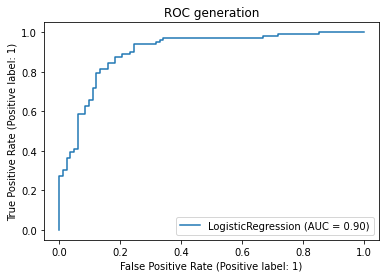

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



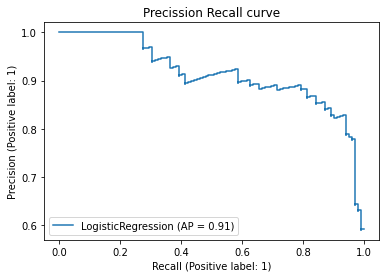

Log loss = 0.38245
AUC = 0.90292
Average Precision = 0.91392

Using 0.5 as threshold:
Accuracy = 0.84239
Precision = 0.83486
Recall = 0.89216
F1 score = 0.86256

Classification Report
Confusion Matrix


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



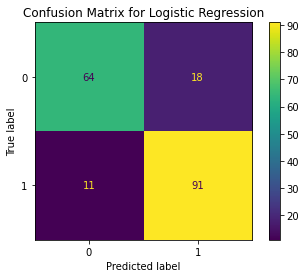

In [15]:
#Train the model 
Classification=LogisticRegression(penalty='none')#without penalty term in the cost function 
Classification.fit(Xtrain,ytrain)

#Evaluation 
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix

Xtest,ytest=GetFeatureAndTargetArrays(DataFrameTest,columns,cat_cols,scaler)
plot_roc_curve(Classification,Xtest,ytest)
plt.title('ROC generation')
plt.show()
plot_precision_recall_curve(Classification,Xtest,ytest)
plt.title('Precission Recall curve')
plt.show()
TestProbability=Classification.predict_proba(Xtest)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred=Classification.predict(Xtest)
#should returns 0,1
fpr1,tpr1,thresholds=roc_curve(ytest,TestProbability)
print('Log loss = {:.5f}'.format(log_loss(ytest, TestProbability)))
print('AUC = {:.5f}'.format(roc_auc_score(ytest, TestProbability)))
print('Average Precision = {:.5f}'.format(average_precision_score(ytest, TestProbability)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, TestPred)))
print('Precision = {:.5f}'.format(precision_score(ytest,TestPred)))
print('Recall = {:.5f}'.format(recall_score(ytest, TestPred)))
print('F1 score = {:.5f}'.format(f1_score(ytest, TestPred)))
print('\nClassification Report')
print('Confusion Matrix')

plot_confusion_matrix(Classification, Xtest, ytest)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [16]:
coefficients=np.hstack((Classification.intercept_,Classification.coef_[0]))
import pandas as pd 
pd.DataFrame(data={'variable:':['intercept']+cat_cols+columns,'coefficients':coefficients})#create the dataframe 


,variable:,coefficients
0,intercept,0.370400
1,Age,0.091498
2,Sex,-0.570689
3,ChestPainType,0.683805
4,RestingBP,0.083428
5,Cholesterol,0.379612
6,FastingBS,0.495254
7,RestingECG,-0.156499
8,MaxHR,-0.403804
9,ExerciseAngina,0.656698


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



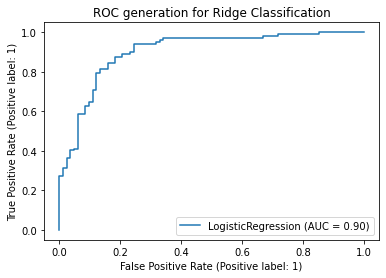

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



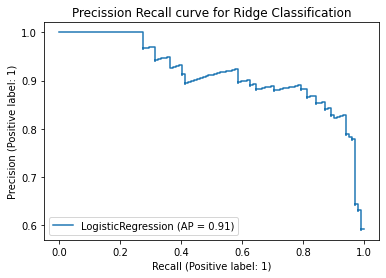

Log loss = 0.38187
AUC = 0.90292
Average Precision = 0.91419

Using 0.5 as threshold:
Accuracy = 0.84783
Precision = 0.84259
Recall = 0.89216
F1 score = 0.86667

Ridge Classification Report
Confusion Matrix


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



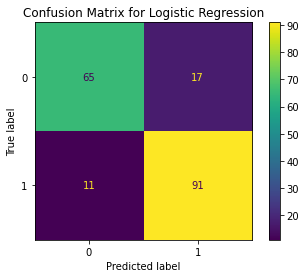

In [17]:
#Regulaized Logistic Regression


#from glmnet import LogitNet
#0 for ridge and 1 for lasso 
#RidgeClassification=LogitNet(alpha=0)
#RidgeClassification.fit(Xtrain,ytrain)
#plot_roc_curve(RidgeClassification,Xtest,ytest)
#plt.title('ROC generation for Ridge Classification')
#plt.show()
#plot_precision_recall_curve(RidgeClassification,Xtest,ytest)
#plt.title('Precission Recall curve for Ridge Classification')
#plt.show()

RidgeC=LogisticRegression(penalty='l2')
RidgeC.fit(Xtrain,ytrain)
plot_roc_curve(RidgeC,Xtest,ytest)
plt.title('ROC generation for Ridge Classification')
plt.show()
plot_precision_recall_curve(RidgeC,Xtest,ytest)
plt.title('Precission Recall curve for Ridge Classification')
plt.show()
TestProbability2=RidgeC.predict_proba(Xtest)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred2=RidgeC.predict(Xtest)
#should returns 0,1
fpr2,tpr2,thresholds=roc_curve(ytest,TestProbability2)
print('Log loss = {:.5f}'.format(log_loss(ytest, TestProbability2)))
print('AUC = {:.5f}'.format(roc_auc_score(ytest, TestProbability2)))
print('Average Precision = {:.5f}'.format(average_precision_score(ytest, TestProbability2)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, TestPred2)))
print('Precision = {:.5f}'.format(precision_score(ytest,TestPred2)))
print('Recall = {:.5f}'.format(recall_score(ytest, TestPred2)))
print('F1 score = {:.5f}'.format(f1_score(ytest, TestPred2)))

print('\nRidge Classification Report')
print('Confusion Matrix')

plot_confusion_matrix(RidgeC, Xtest, ytest)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [18]:
coefficients=np.hstack((RidgeC.intercept_,RidgeC.coef_[0]))
import pandas as pd 
pd.DataFrame(data={'variable:':['intercept']+cat_cols+columns,'coefficients':coefficients})#create the dataframe 

,variable:,coefficients
0,intercept,0.368370
1,Age,0.092572
2,Sex,-0.560214
3,ChestPainType,0.673866
4,RestingBP,0.082333
5,Cholesterol,0.370906
6,FastingBS,0.487861
7,RestingECG,-0.151627
8,MaxHR,-0.401206
9,ExerciseAngina,0.650459


In [19]:
'''
Ridge logistic regression:
Log loss = 0.38187
AUC = 0.90292
Average Precision = 0.91419

Using 0.5 as threshold:
Accuracy = 0.84783
Precision = 0.84259
Recall = 0.89216
F1 score = 0.86667
'''

'''
Logisitc Classification:

Log loss = 0.38245
AUC = 0.90292
Average Precision = 0.91392

Using 0.5 as threshold:
Accuracy = 0.84239
Precision = 0.83486
Recall = 0.89216
F1 score = 0.86256
'''
#WE can see the benchmark are slightly better but not perfect , let choose the penalty parameter by use K-fold cross vaidation/Leave-one-out Cross-valldated
# for ridge parameter minimizing the cross-validated error.

#Since the performance were not show a significant progress, we now draw 10% of the data and test and train with 0.8 and 0.2 in that 10% of data

'\nLogisitc Classification:\n\nLog loss = 0.38245\nAUC = 0.90292\nAverage Precision = 0.91392\n\nUsing 0.5 as threshold:\nAccuracy = 0.84239\nPrecision = 0.83486\nRecall = 0.89216\nF1 score = 0.86256\n'

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



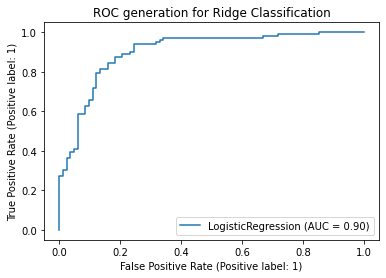

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



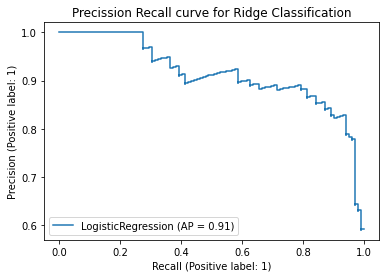

Log loss = 0.38244
AUC = 0.90292
Average Precision = 0.91392

Using 0.5 as threshold:
Accuracy = 0.84239
Precision = 0.83486
Recall = 0.89216
F1 score = 0.86256

Ridge Classification Report
Confusion Matrix


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



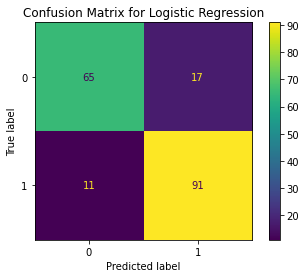

In [20]:
lassoC=LogisticRegression(penalty='l1',solver='liblinear',C=200)
lassoC.fit(Xtrain,ytrain)
plot_roc_curve(lassoC,Xtest,ytest)
plt.title('ROC generation for Ridge Classification')
plt.show()
plot_precision_recall_curve(lassoC,Xtest,ytest)
plt.title('Precission Recall curve for Ridge Classification')
plt.show()
TestProbability3=lassoC.predict_proba(Xtest)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred3=lassoC.predict(Xtest)
#should returns 0,1
fpr3,tpr3,thresholds=roc_curve(ytest,TestProbability3)
print('Log loss = {:.5f}'.format(log_loss(ytest, TestProbability3)))
print('AUC = {:.5f}'.format(roc_auc_score(ytest, TestProbability3)))
print('Average Precision = {:.5f}'.format(average_precision_score(ytest, TestProbability3)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, TestPred3)))
print('Precision = {:.5f}'.format(precision_score(ytest,TestPred3)))
print('Recall = {:.5f}'.format(recall_score(ytest, TestPred3)))
print('F1 score = {:.5f}'.format(f1_score(ytest, TestPred3)))

print('\nRidge Classification Report')
print('Confusion Matrix')

plot_confusion_matrix(RidgeC, Xtest, ytest)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

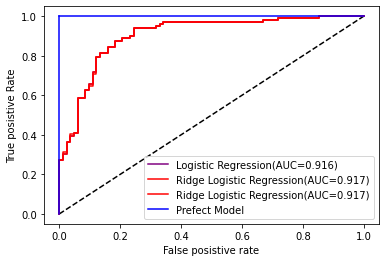

In [21]:
plt.plot(fpr1,tpr1,color='purple',label= "Logistic Regression(AUC=0.916)")
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr2,tpr2,label='Ridge Logistic Regression(AUC=0.917)',color='r')
plt.plot(fpr3,tpr3,label='Ridge Logistic Regression(AUC=0.917)',color='r')
plt.plot([0,0],[0,1], '-',color='b')
plt.plot([0,1],[1,1], '-',color='b',label='Prefect Model')
plt.xlabel('False posistive rate')
plt.ylabel('True posistive Rate')
plt.legend()
plt.show()

In [22]:
#print(DataFrame)
#FeatureVariable=DataFrame.iloc[:,:-1]
#TargetVariable=DataFrame.iloc[:,11]
TestData=DataFrame.iloc[500:917,:-1]
TestY=DataFrame.iloc[500:917,11] #test data 417

In [23]:
logistic2=LogisticRegression(penalty='none')
ridgec=LogisticRegression(penalty='l2')
lassoC=LogisticRegression(penalty='l1',solver='liblinear')
elastic=LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.99)
accuRidge=[]
accuLogistic=[]
accuLasso=[]
accuElastic=[]
for i in range(2,250):
    alpha=i*2
    FeatureVariable=DataFrame.iloc[0:alpha,:-1]
    TargetVariable=DataFrame.iloc[0:alpha,11]
    logistic2.fit(FeatureVariable,TargetVariable )
    ridgec.fit(FeatureVariable,TargetVariable)
    lassoC.fit(FeatureVariable,TargetVariable)
    elastic.fit(FeatureVariable,TargetVariable)
    pred1=ridgec.predict(TestData)
    pred2=logistic2.predict(TestData)
    pred3=lassoC.predict(TestData)
    pred4=elastic.predict(TestData)
    accuRidge.append(accuracy_score(TestY, pred1))
    accuLogistic.append(accuracy_score(TestY,pred2))
    accuLasso.append(accuracy_score(TestY,pred3))
    accuElastic.append(accuracy_score(TestY,pred4))
    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skle

KeyboardInterrupt: 

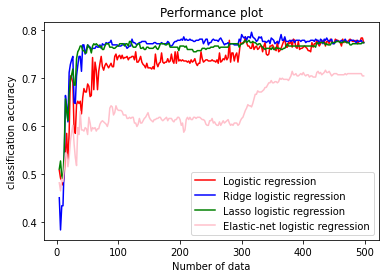

In [ ]:
plt.plot([2*i for i in range(2,250)], accuLogistic, color='red',label='Logistic regression')
plt.plot([2*i for i in range(2,250)], accuRidge, color='blue',label='Ridge logistic regression')
plt.plot([2*i for i in range(2,250)], accuLasso, color='green',label='Lasso logistic regression')
plt.plot([2*i for i in range(2,250)], accuElastic, color='pink',label='Elastic-net logistic regression')
plt.title('Performance plot')
plt.xlabel('Number of data')
plt.ylabel('classification accuracy')
plt.legend()
#plt.vlines(x=11,colors='black',ymin=0.4,ymax=0.8,linestyles='--')

In [ ]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets
eps = 5e-3  # the smaller it is the longer is the path
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(Xtrain, ytrain, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(Xtrain, ytrain, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


(0.4581392664109205,
 2.9892722616413,
 -0.07856591391329826,
 0.13267865289090122)

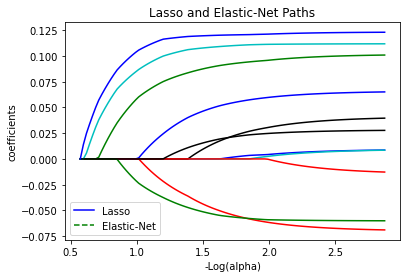

In [ ]:
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    #l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


In [ ]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


>acc=0.900, est=0.932, cfg={'max_features': 4, 'n_estimators': 100}
>acc=0.940, est=0.924, cfg={'max_features': 4, 'n_estimators': 500}
>acc=0.930, est=0.929, cfg={'max_features': 4, 'n_estimators': 500}
>acc=0.930, est=0.927, cfg={'max_features': 6, 'n_estimators': 100}
>acc=0.920, est=0.927, cfg={'max_features': 4, 'n_estimators': 100}
>acc=0.950, est=0.927, cfg={'max_features': 4, 'n_estimators': 500}
>acc=0.910, est=0.918, cfg={'max_features': 2, 'n_estimators': 100}
>acc=0.930, est=0.924, cfg={'max_features': 6, 'n_estimators': 500}
>acc=0.960, est=0.926, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.900, est=0.937, cfg={'max_features': 4, 'n_estimators': 500}
Accuracy: 0.927 (0.019)


Text(0, 0.5, 'Cross-Validated Accuracy')

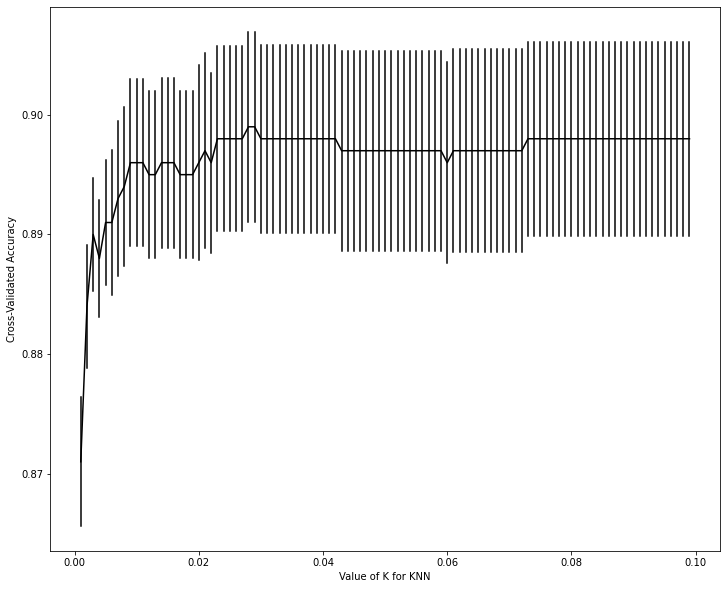

In [ ]:
fig,ax=plt.subplots(figsize=(12,10))#figure and axes object(s) with size (10,10)
from sklearn.model_selection import cross_val_score
c=[i*0.001 for i in range(1,100)]
accuracy=[]
sd=[]
for element in c:
    model=LogisticRegression(penalty='l2',C=element)
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    accuracy.append(scores.mean())
    sd.append(np.std(scores)/np.sqrt(len(scores)))

import matplotlib.pyplot as plt

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(c, accuracy,color='black')
for i in range(len(sd)):
    plt.plot([c[i],c[i]],[accuracy[i]+sd[i],accuracy[i]-sd[i]],color='black')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


    
    

100
